In [1]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
import glob

In [2]:
# read data from the download service -- alert-based

dirname = "/media3/CRP7/hosts/data/TNS/Apr2023/ftransfer_ztf_2023-08-30_761838/"
data_all = pd.read_parquet(dirname)

In [3]:
# choose object id
name = 'ZTF19adczgih'

In [4]:
# this will take a long time
flist = glob.glob('/media3/CRP7/hosts/data/TNS/Apr2023/obj_info/*.pickle')

data_list = []
for fname in flist:
    data_temp = pd.read_pickle(fname)
    data_list.append(data_temp)

data_pd = pd.concat(data_list, ignore_index=True)

In [5]:
list(data_pd.keys())

['b:cutoutDifference_stampData',
 'b:cutoutScience_stampData',
 'b:cutoutTemplate_stampData',
 'd:DR3Name',
 'd:Plx',
 'd:anomaly_score',
 'd:cdsxmatch',
 'd:e_Plx',
 'd:gcvs',
 'd:mangrove_2MASS_name',
 'd:mangrove_HyperLEDA_name',
 'd:mangrove_ang_dist',
 'd:mangrove_lum_dist',
 'd:mulens',
 'd:nalerthist',
 'd:rf_kn_vs_nonkn',
 'd:rf_snia_vs_nonia',
 'd:roid',
 'd:snn_sn_vs_all',
 'd:snn_snia_vs_nonia',
 'd:t2_AGN',
 'd:t2_EB',
 'd:t2_KN',
 'd:t2_M-dwarf',
 'd:t2_Mira',
 'd:t2_RRL',
 'd:t2_SLSN-I',
 'd:t2_SNII',
 'd:t2_SNIa',
 'd:t2_SNIa-91bg',
 'd:t2_SNIax',
 'd:t2_SNIbc',
 'd:t2_TDE',
 'd:t2_mu-Lens-Single',
 'd:vsx',
 'd:x3hsp',
 'd:x4lac',
 'i:aimage',
 'i:aimagerat',
 'i:bimage',
 'i:bimagerat',
 'i:candid',
 'i:chinr',
 'i:chipsf',
 'i:classtar',
 'i:clrcoeff',
 'i:clrcounc',
 'i:clrmed',
 'i:clrrms',
 'i:dec',
 'i:decnr',
 'i:diffmaglim',
 'i:distnr',
 'i:distpsnr1',
 'i:distpsnr2',
 'i:distpsnr3',
 'i:drb',
 'i:drbversion',
 'i:dsdiff',
 'i:dsnrms',
 'i:elong',
 'i:exptime',

In [6]:
data_pd.shape

(91303, 157)

In [7]:
x = data_pd[data_pd['i:objectId'].values == name]['i:jd'].values
y = data_pd[data_pd['i:objectId'].values == name]['i:magpsf'].values
yerr = data_pd[data_pd['i:objectId'].values == name]['i:sigmapsf'].values
fid = data_pd[data_pd['i:objectId'].values == name]['i:fid'].values

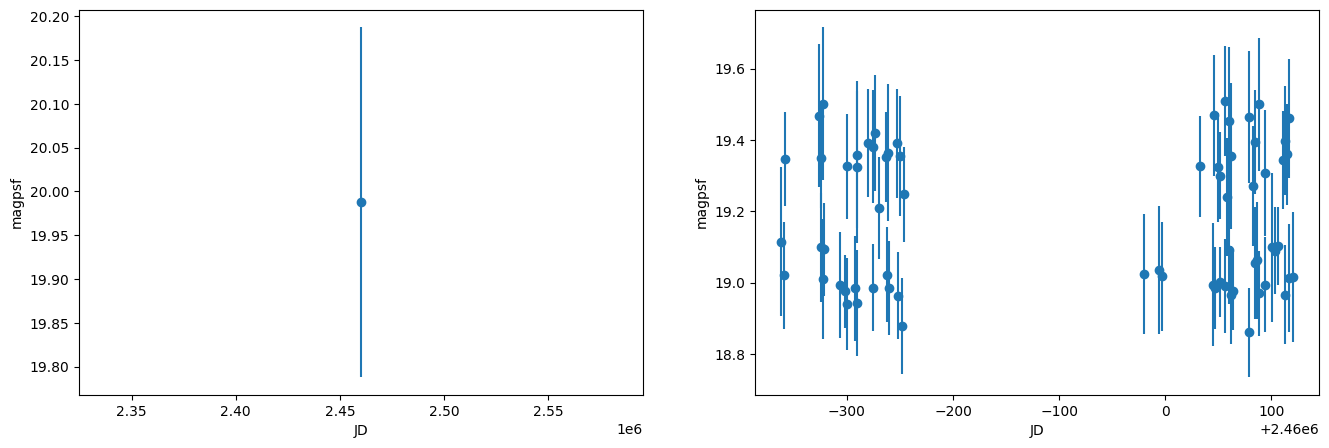

In [8]:
plt.figure(figsize=[16,5])

for i in range(1,3):
    plt.subplot(1,2, i)
    flag = fid == i
    plt.errorbar(x[flag], y[flag], yerr=yerr[flag], fmt='o')
    plt.xlabel('JD')
    plt.ylabel('magpsf')

plt.show()

In [18]:
columns = [
    'b:cutoutScience_stampData',
    'b:cutoutTemplate_stampData',
    'b:cutoutDifference_stampData',
    'i:objectId'
]

for name in np.unique(data_pd['i:objectId'].values)[:100]:

    stamps = data_pd[data_pd['i:objectId'].values == name]
    stamps[columns].to_csv('../data_preparation/' + name + '.csv')

In [17]:
stamps[columns]

,b:cutoutScience_stampData,b:cutoutTemplate_stampData,b:cutoutDifference_stampData,i:jd
171,"[[476.1653747559, 452.9665222168, 439.97653198...","[[462.6940307617, 447.4367980957, 435.56796264...","[[-6.9633021355, -6.1955680847, 0.4930436909, ...",2.460121e+06
184,"[[328.612487793, 331.8599243164, 323.491363525...","[[334.5286865234, 330.0857543945, 329.89147949...","[[-1.8804454803000001, -3.8966772556000002, 4....",2.460117e+06
185,"[[468.4847106934, 443.8941650391, 423.99523925...","[[461.8700561523, 436.2755432129, 427.73822021...","[[6.7463307381, -6.8497376442, -2.6378889084, ...",2.460117e+06
198,"[[322.663482666, 318.8542175293, 340.433197021...","[[333.9265136719, 329.0205993652, 328.71417236...","[[10.2580947876, 7.8008880615, -10.931634903, ...",2.460115e+06
207,"[[410.2833862305, 369.4623413086, 355.84417724...","[[377.0155029297, 363.1102294922, 344.93930053...","[[10.7752227783, 4.2300953865, -9.8208856583, ...",2.460113e+06
...,...,...,...,...
1430,"[[404.5982666016, 385.6364135742, 391.46801757...","[[403.8417663574, 390.4991760254, 382.56274414...","[[5.9491415024, 9.5730514526, -10.4878149033, ...",2.459676e+06
1445,"[[274.2935180664, 270.1773071289, 270.63928222...","[[264.1239013672, 262.3327636719, 265.58407592...","[[-10.3815898895, -7.4044489861, -4.3440036774...",2.459674e+06
1458,"[[338.8604125977, 327.6885986328, 335.30538940...","[[337.3745422363, 335.4352111816, 337.90240478...","[[-4.4465098381, 0.0654404014, 5.1245779991, 5...",2.459642e+06
1465,"[[444.0426635742, 457.9796447754, 445.04470825...","[[468.1696472168, 444.8569030762, 437.69241333...","[[13.533490181, -11.8477869034, -6.941286087, ...",2.459641e+06


In [10]:
np.unique(stamps['d:mangrove_2MASS_name'].values, return_counts=True)

(array(['14020340-2539338', 'nan'], dtype=object), array([39, 31]))

In [11]:
flag_stamps = np.array([str(stamps['d:mangrove_2MASS_name'].values[i]) for i in range(stamps.shape[0])]) == 'nan'

In [12]:
np.unique(flag_stamps, return_counts=True)

(array([False,  True]), array([39, 31]))

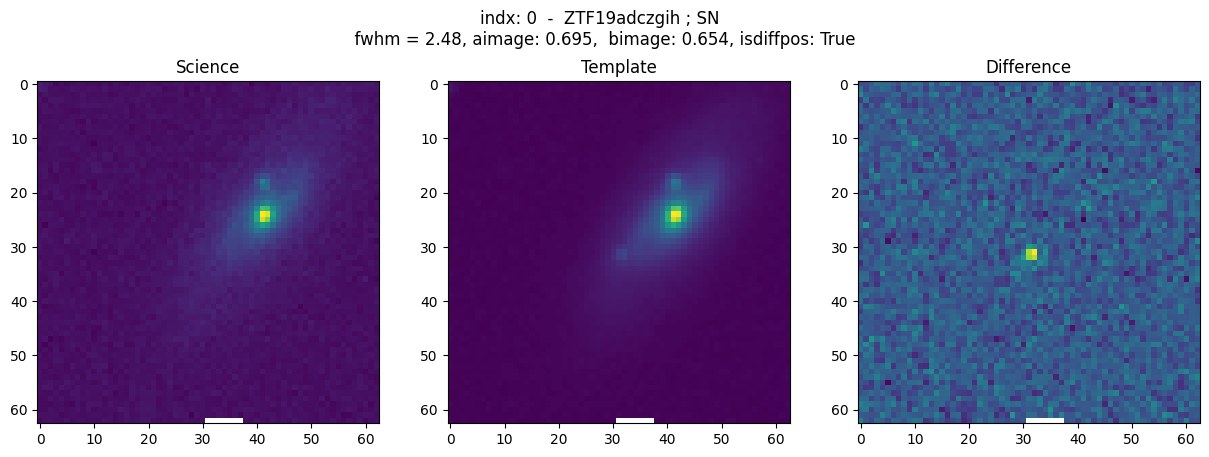

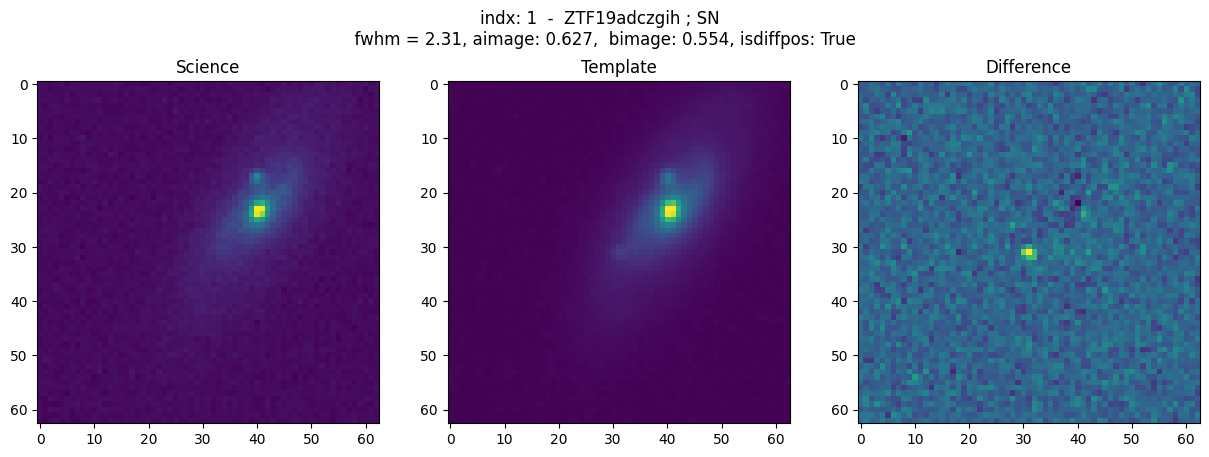

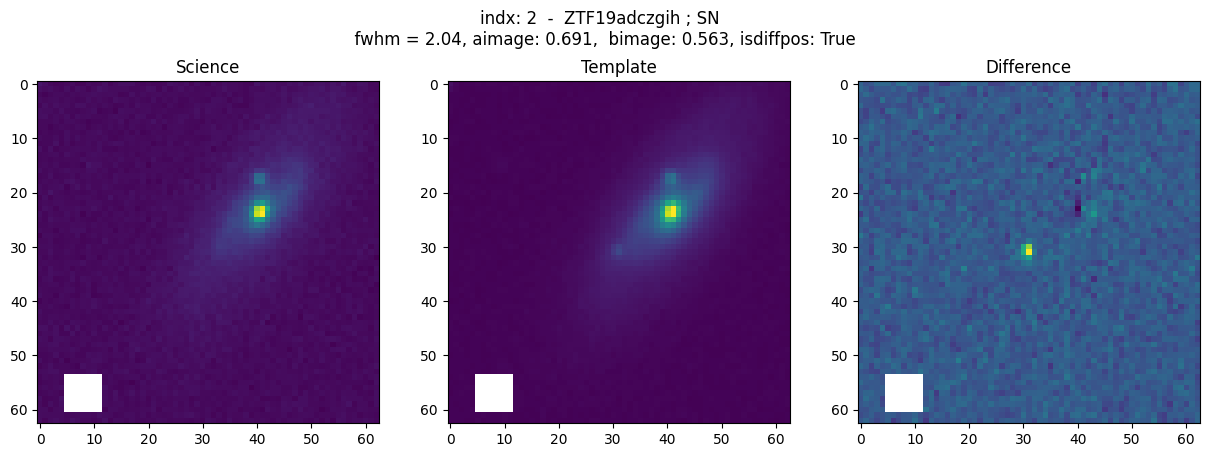

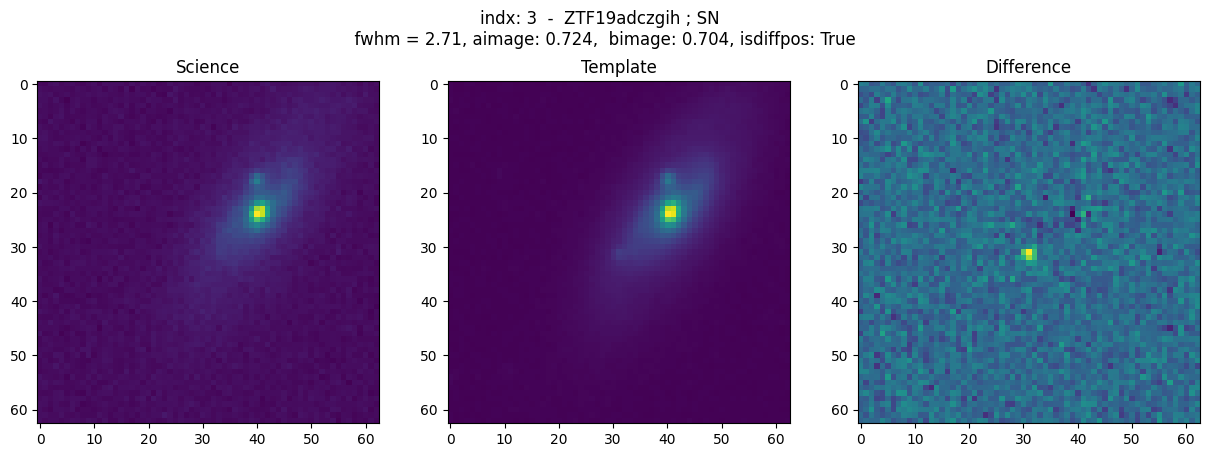

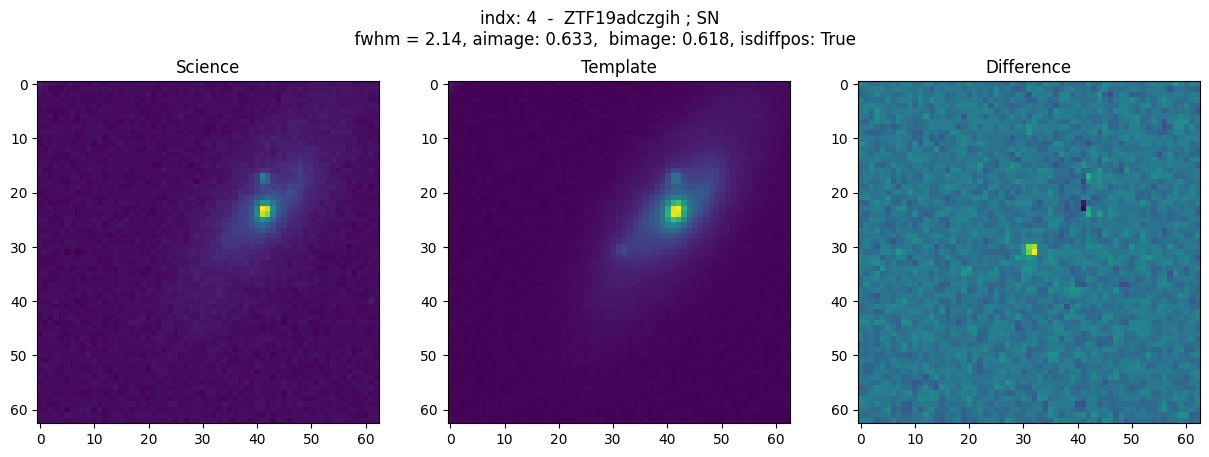

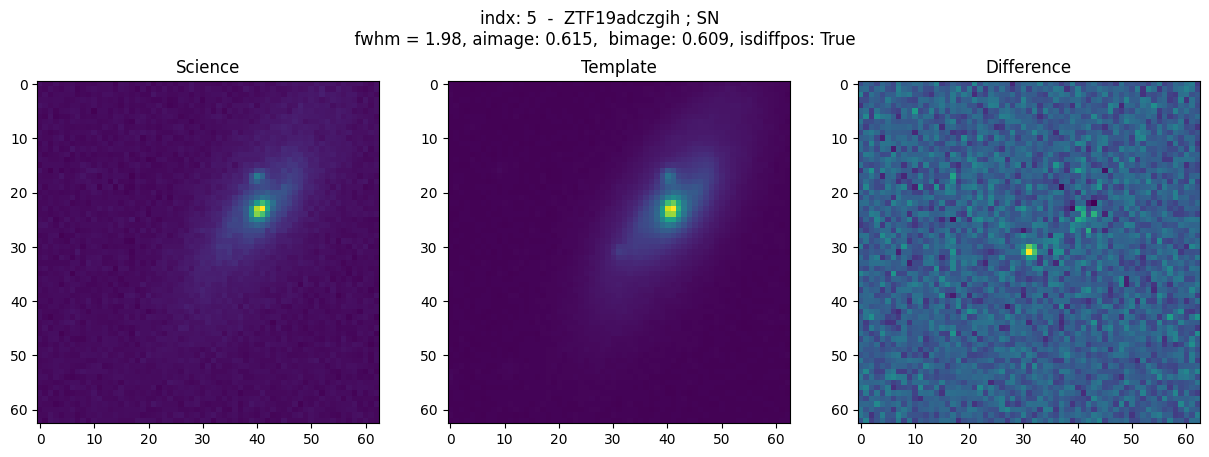

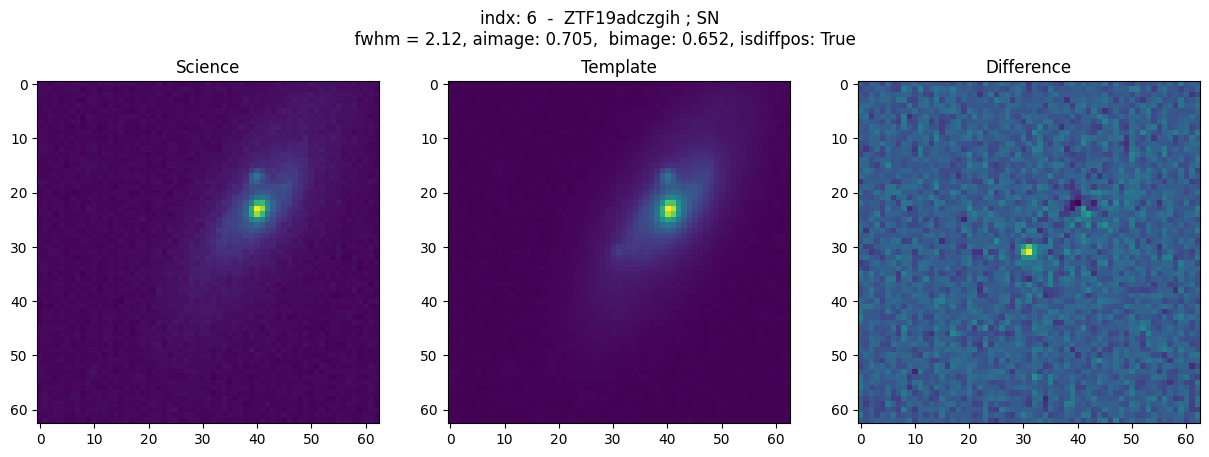

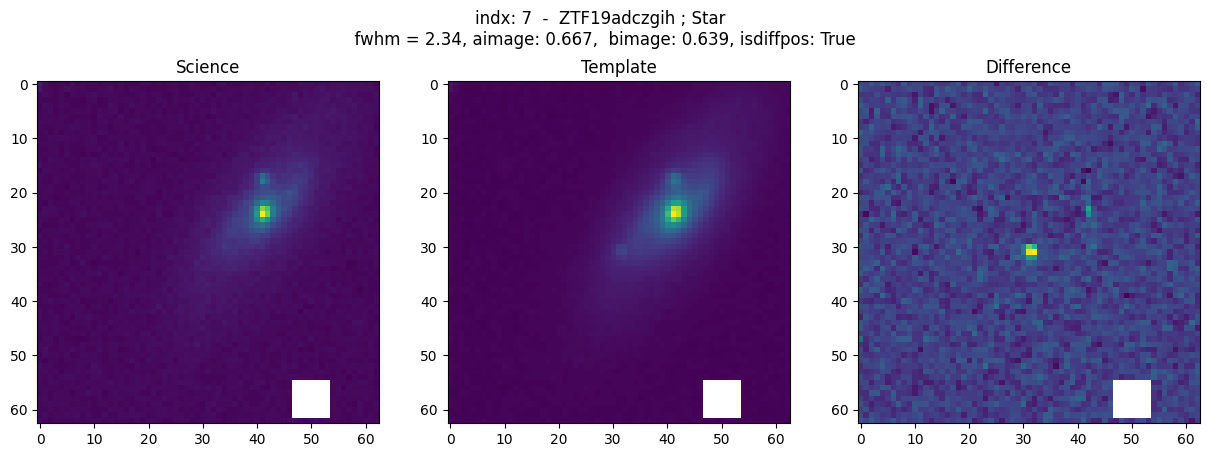

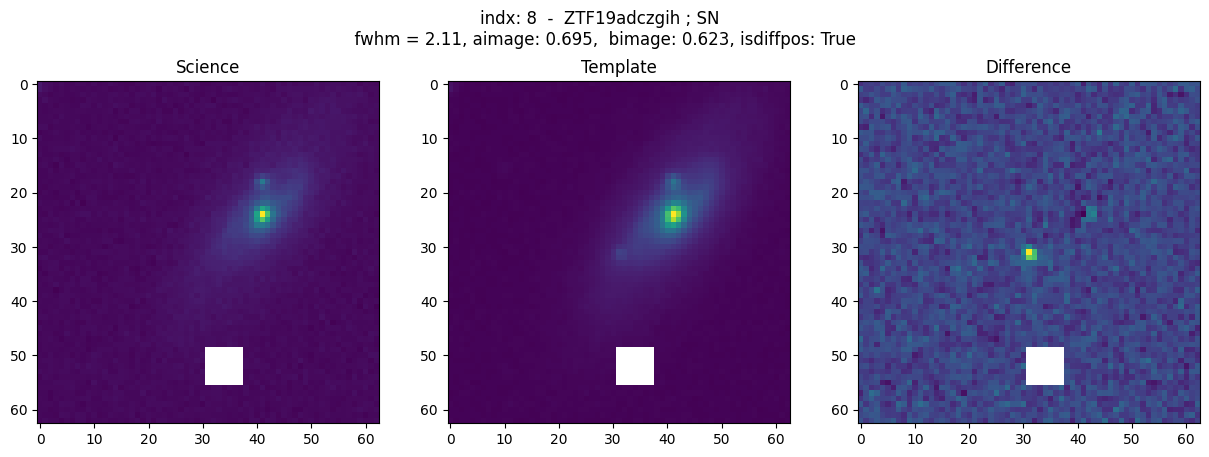

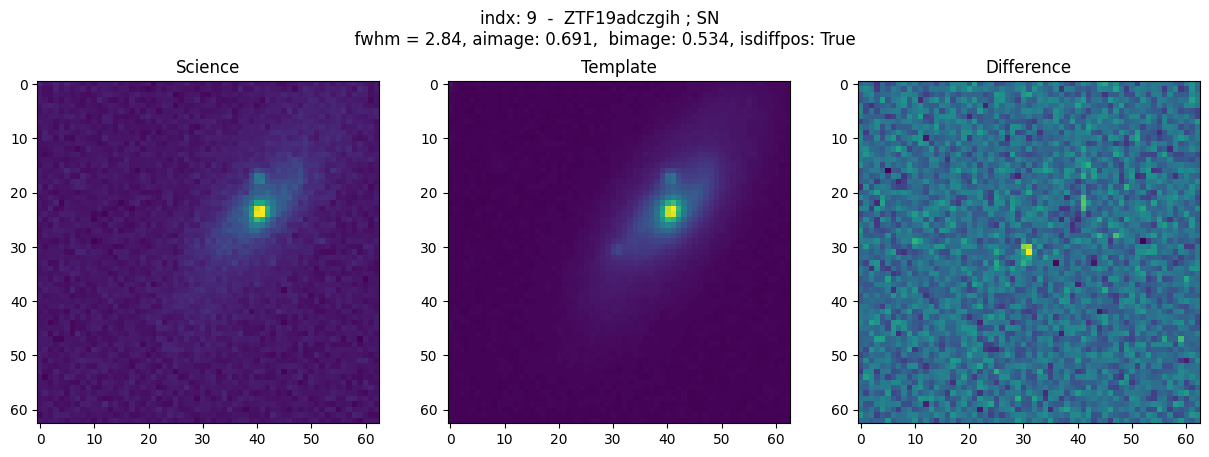

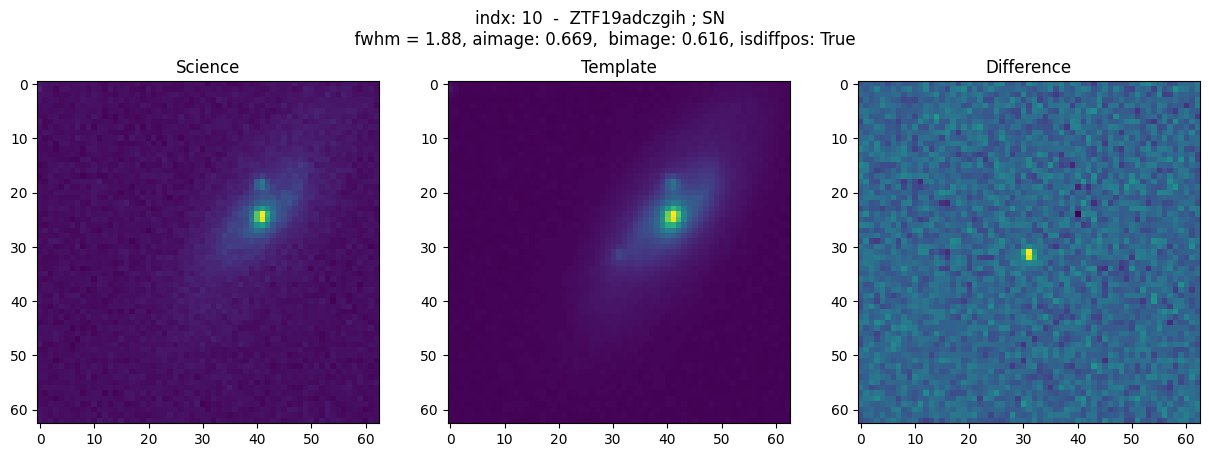

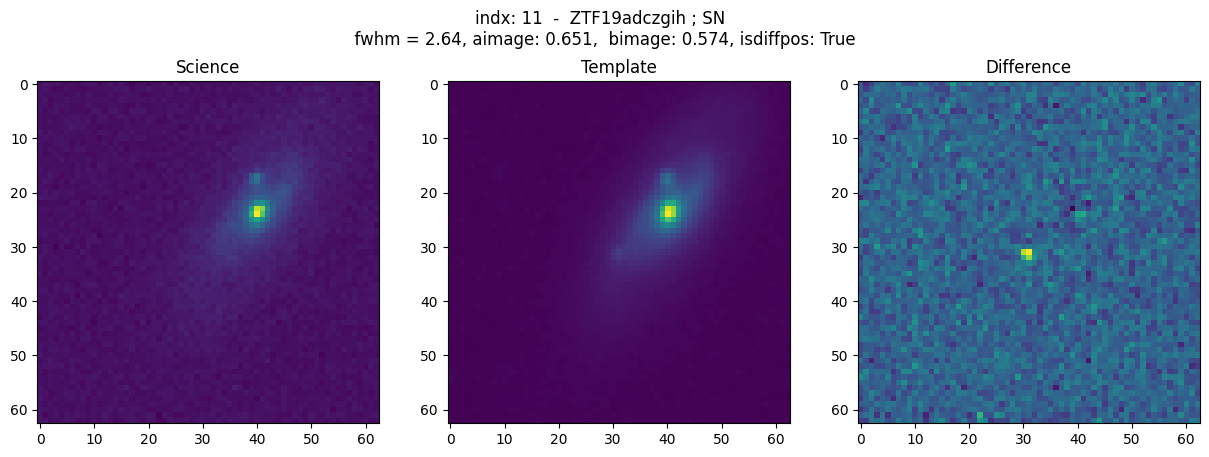

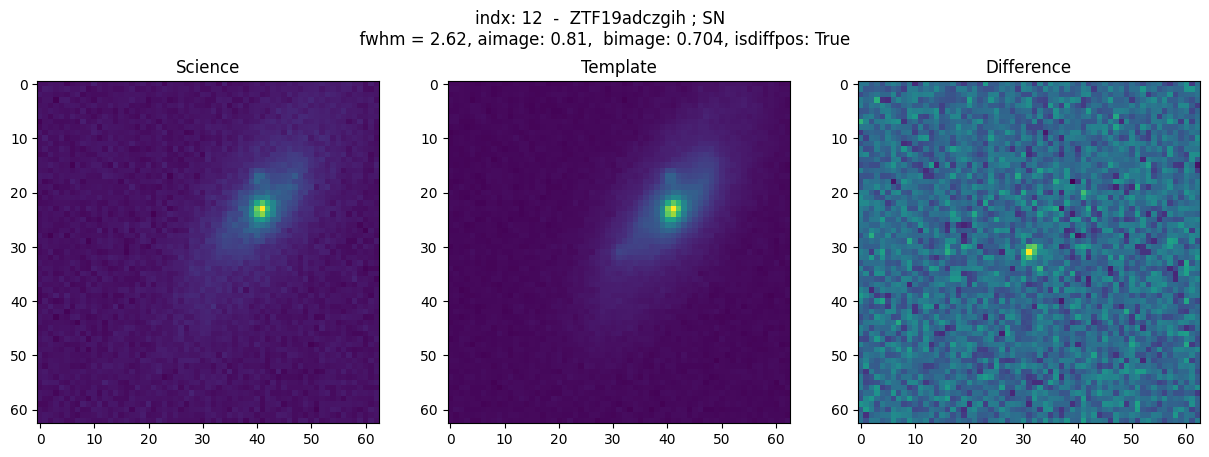

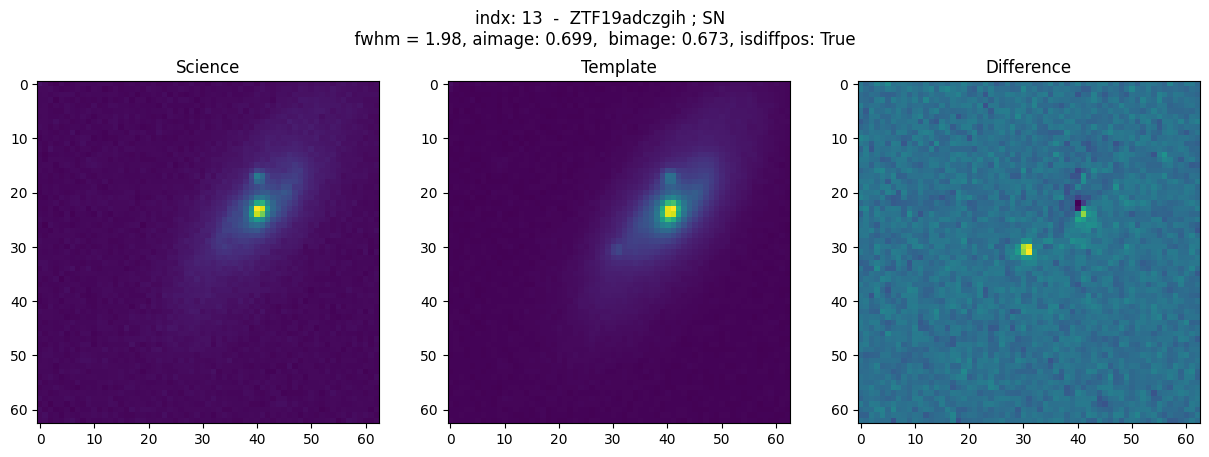

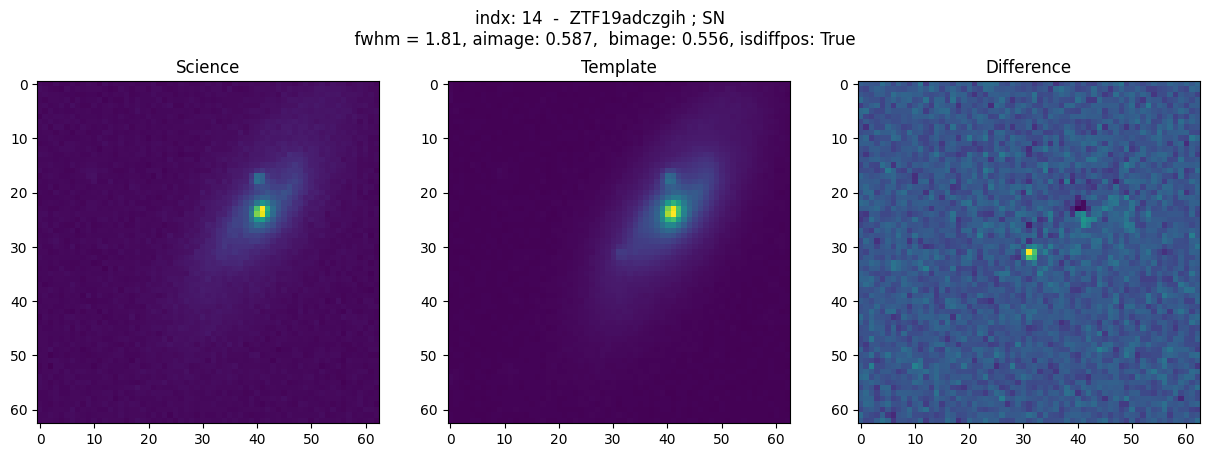

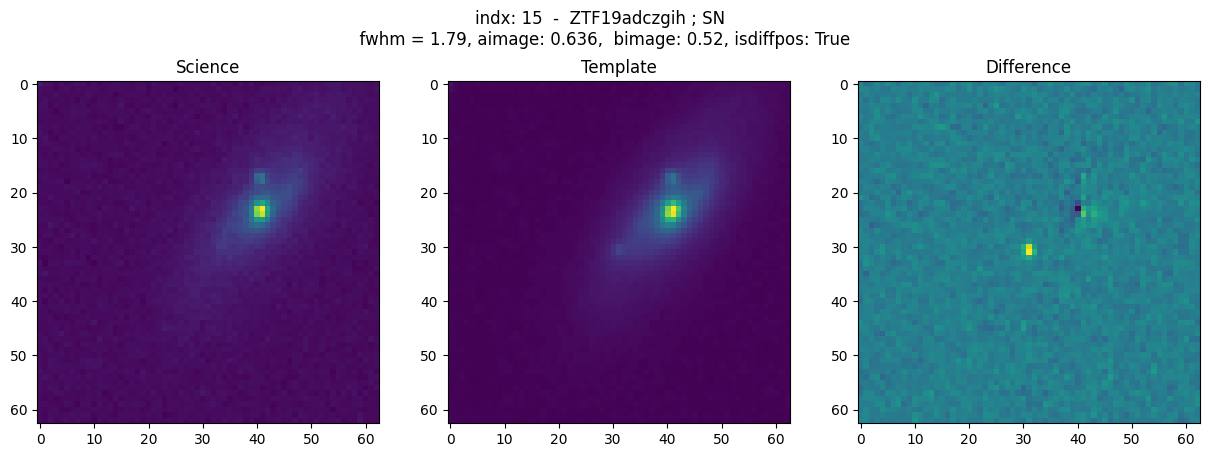

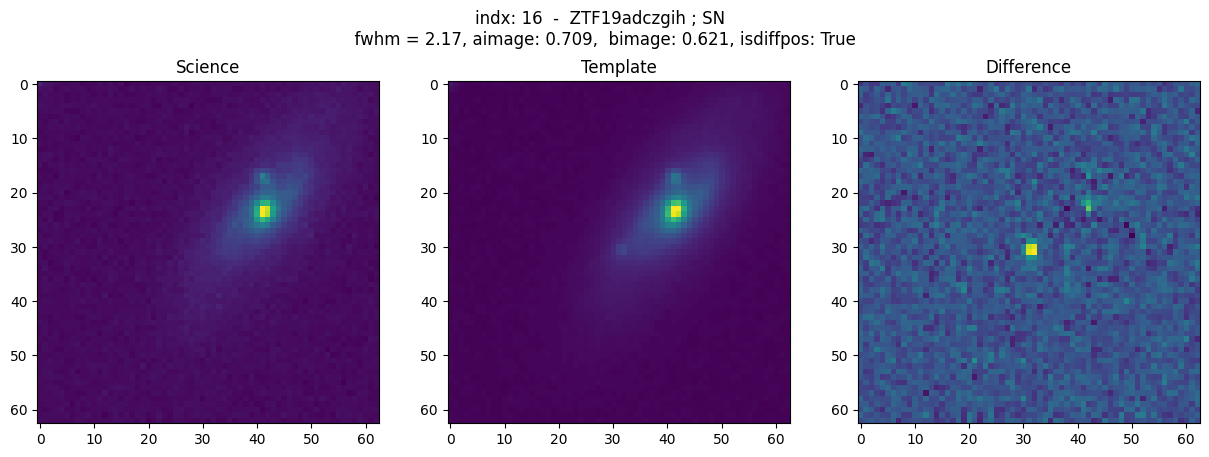

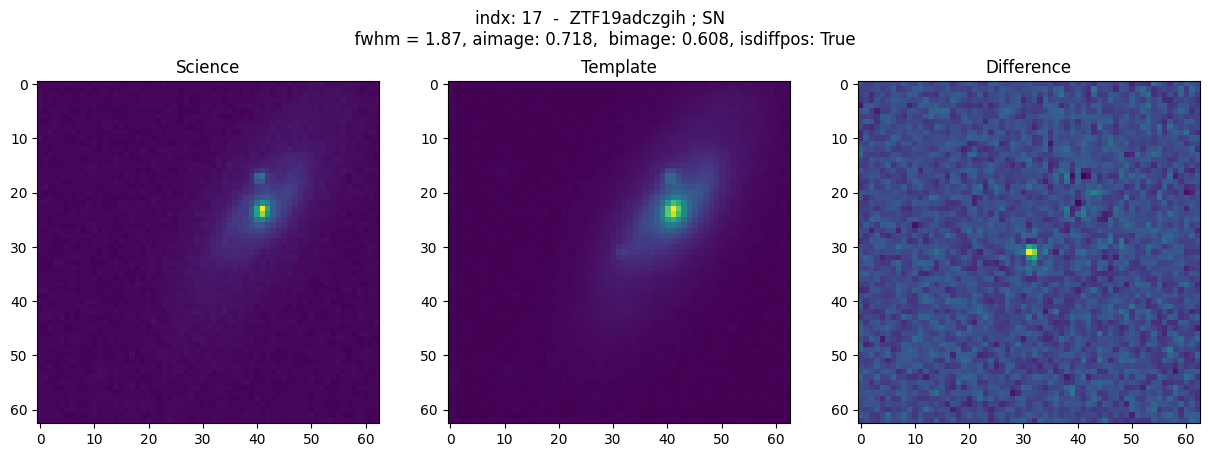

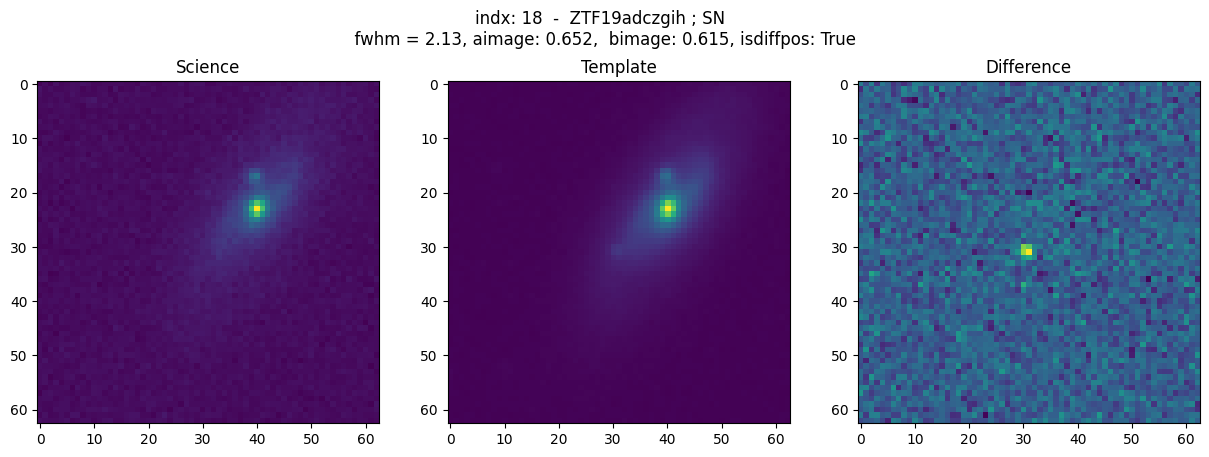

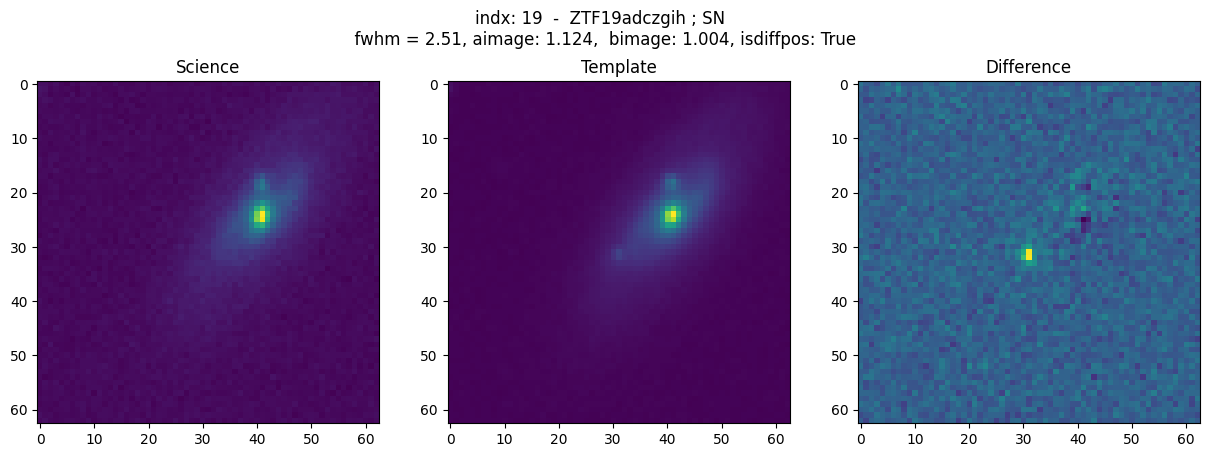

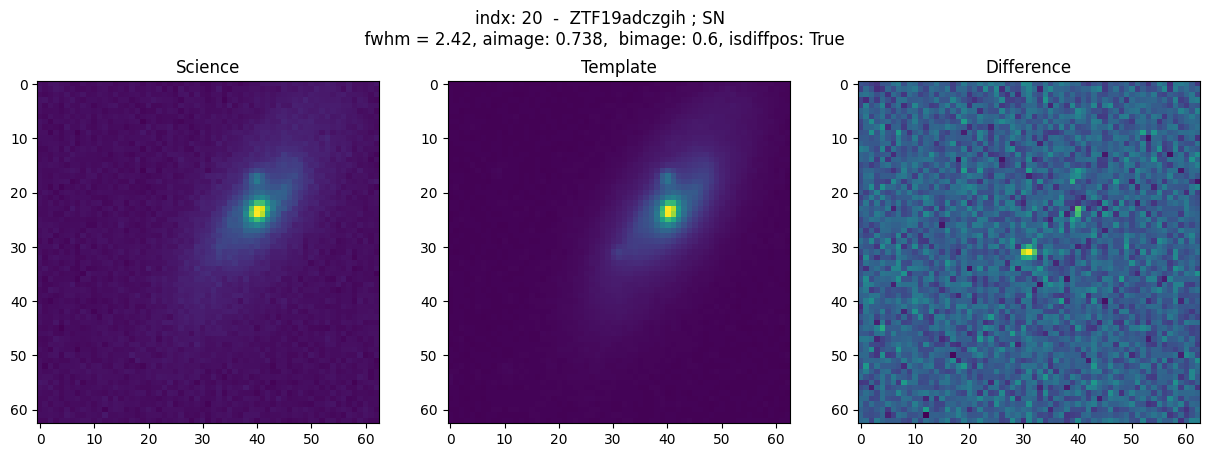

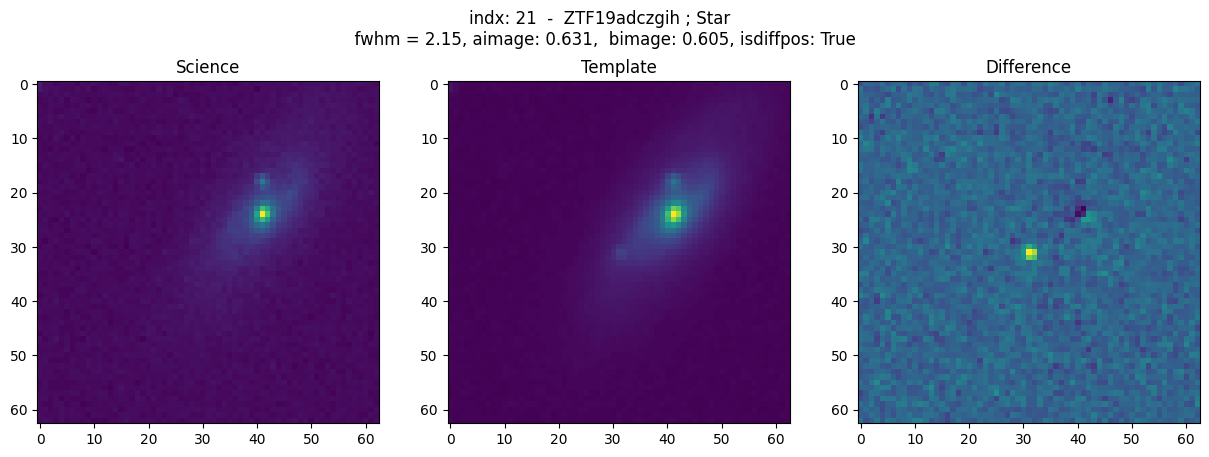

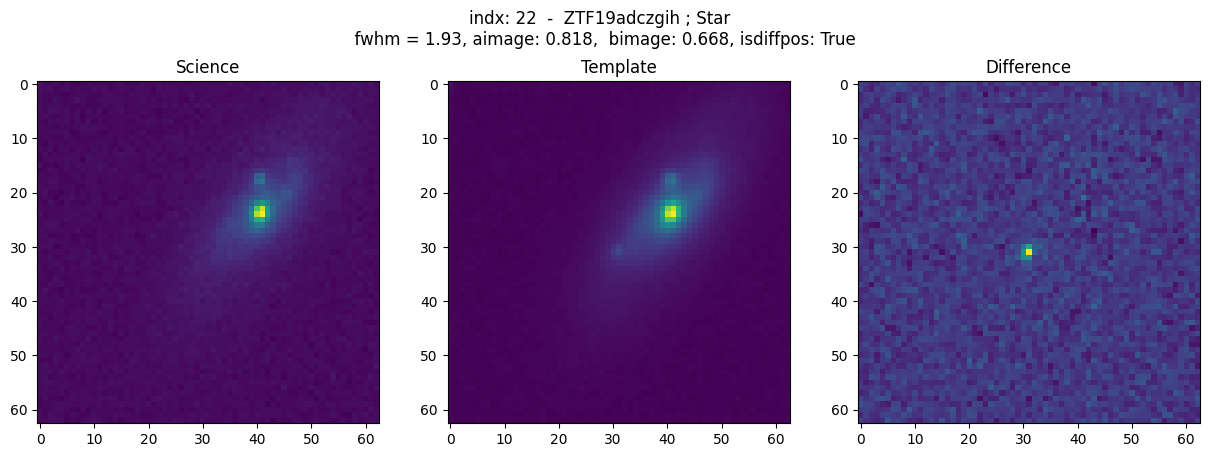

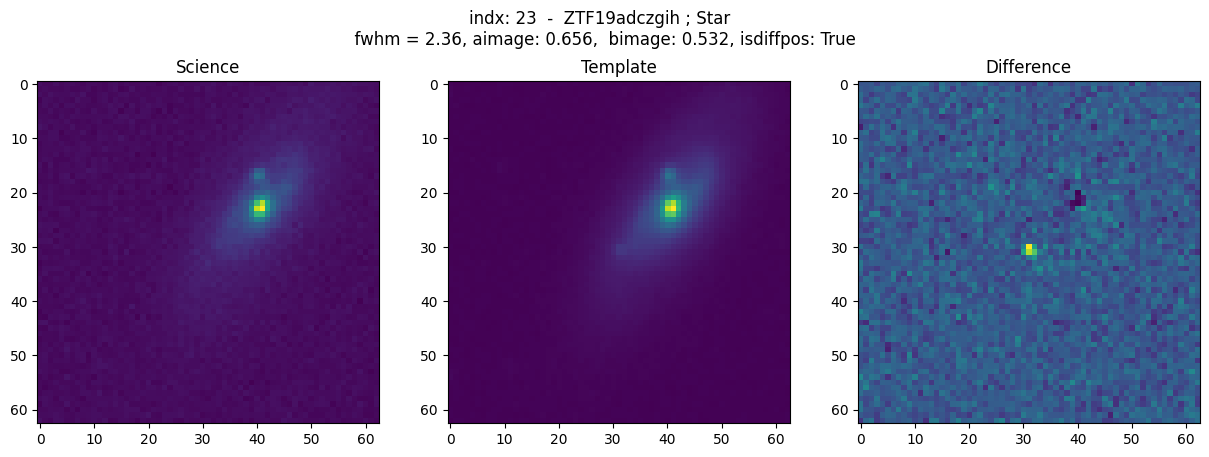

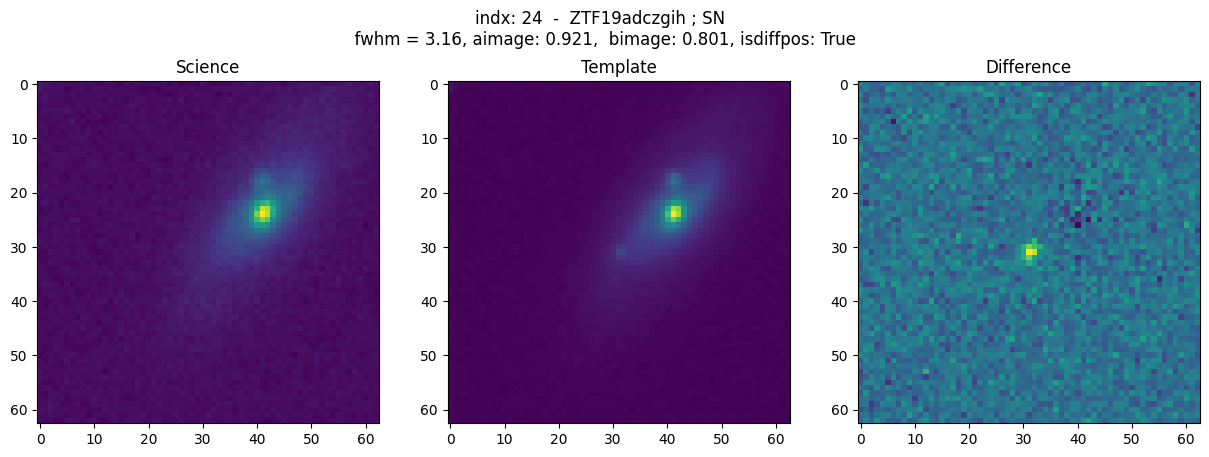

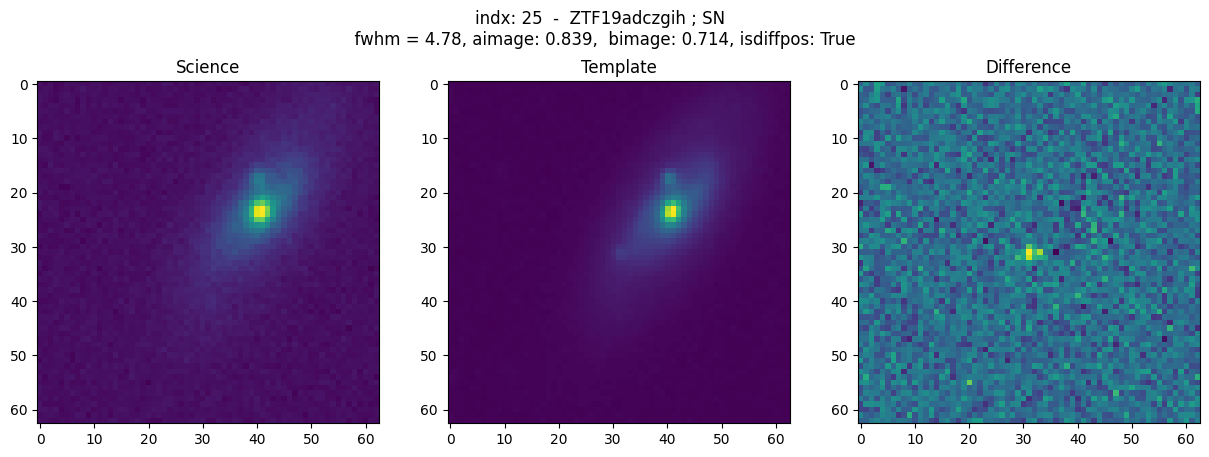

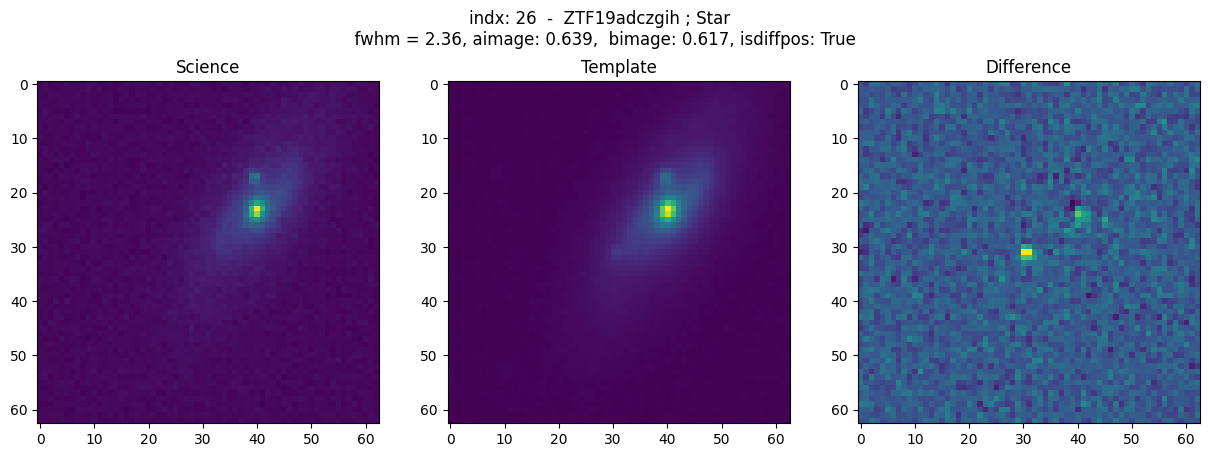

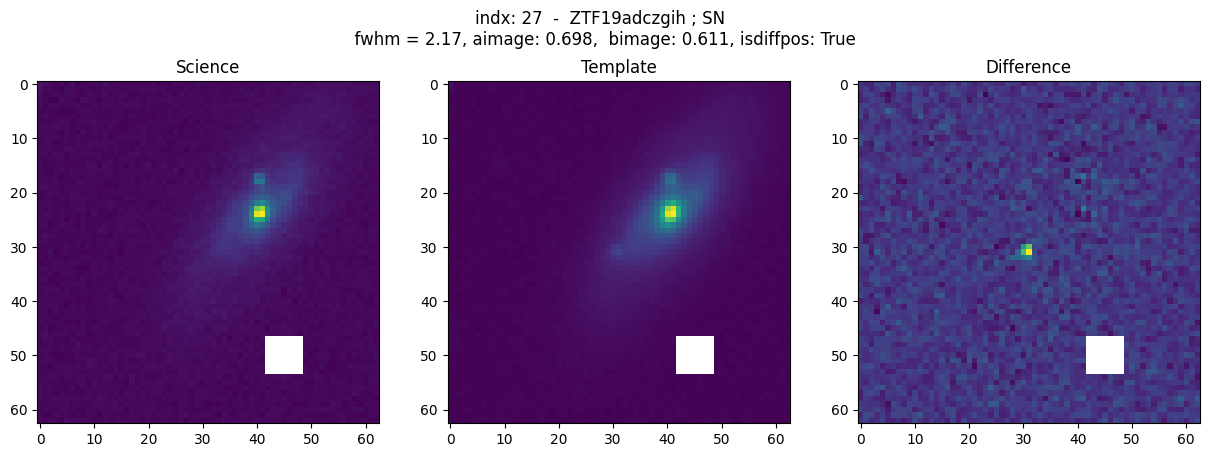

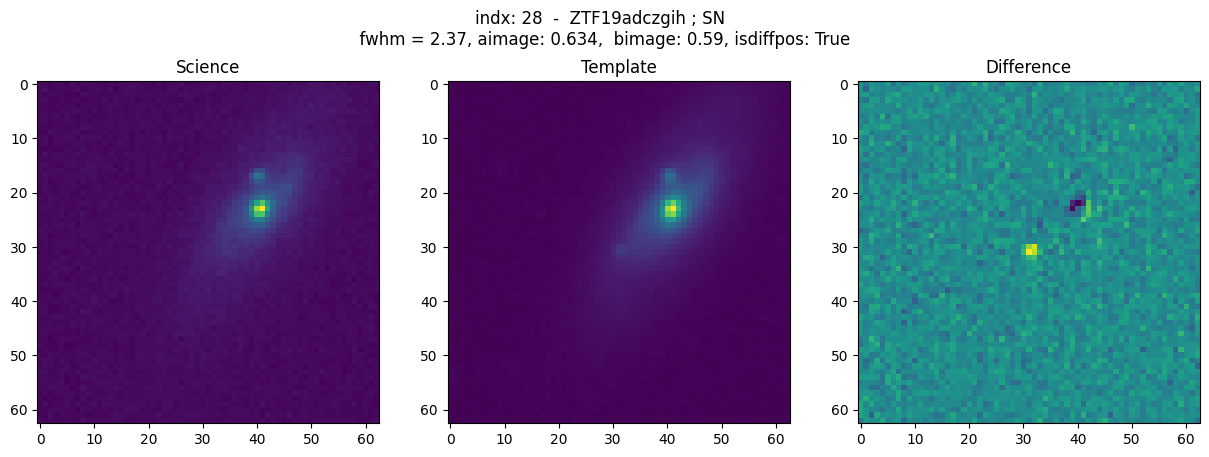

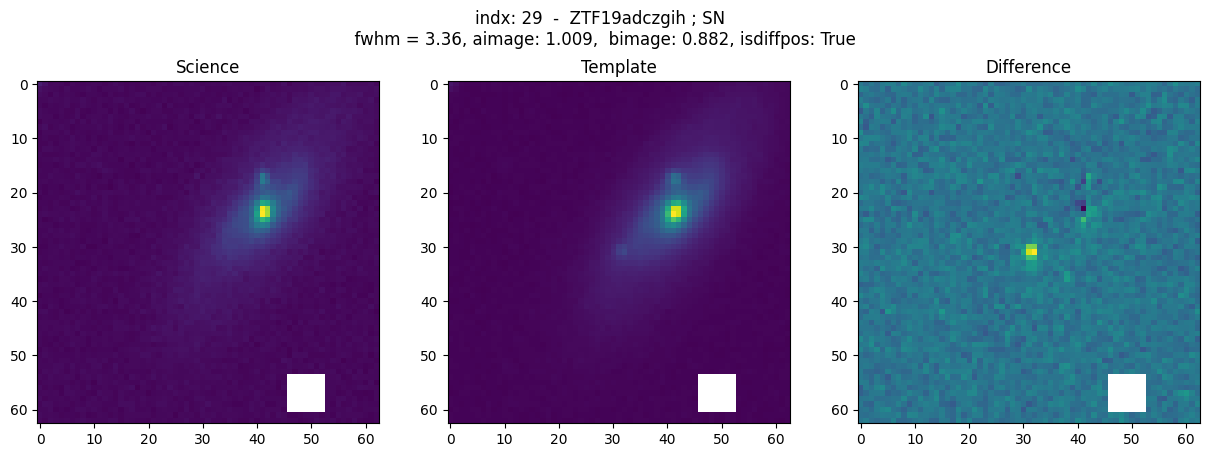

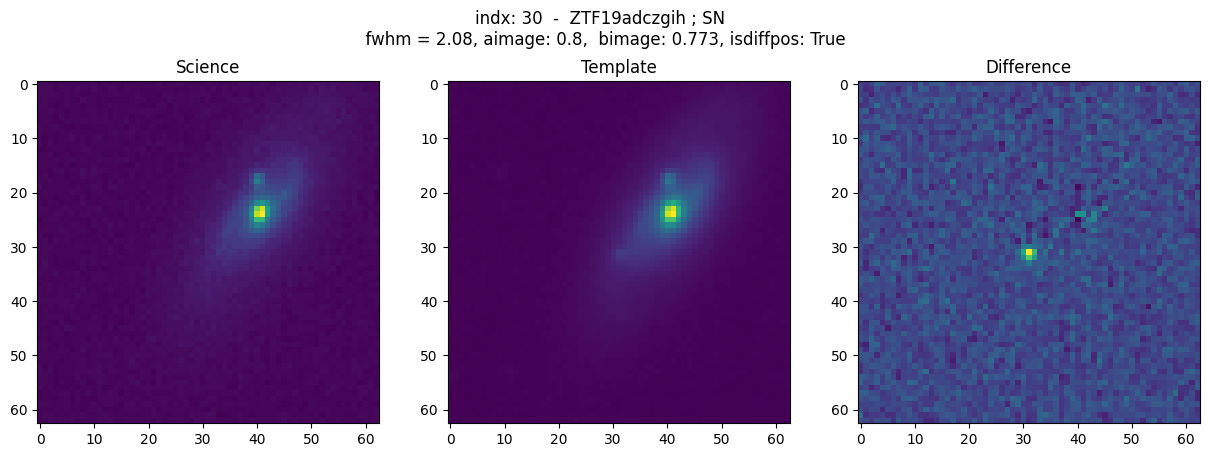

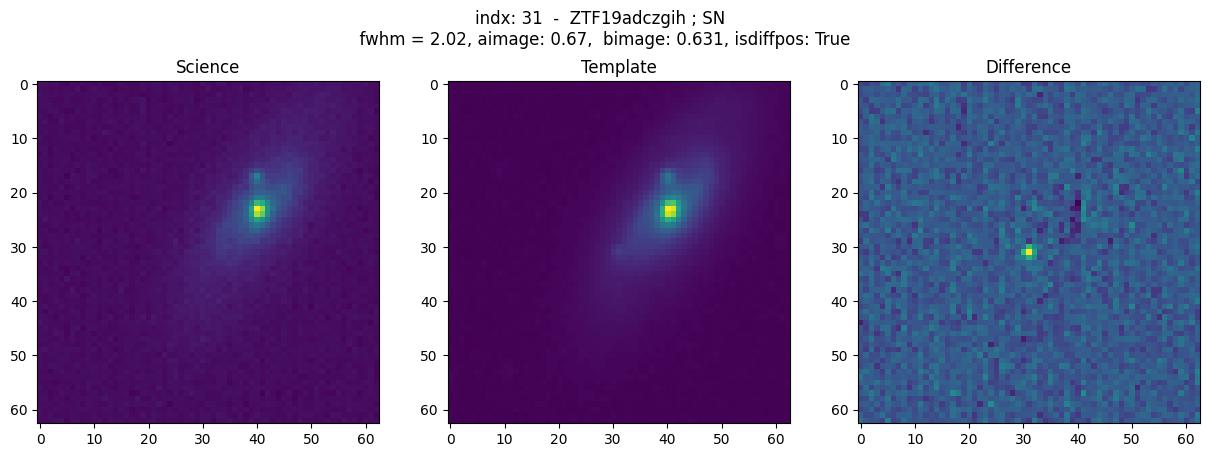

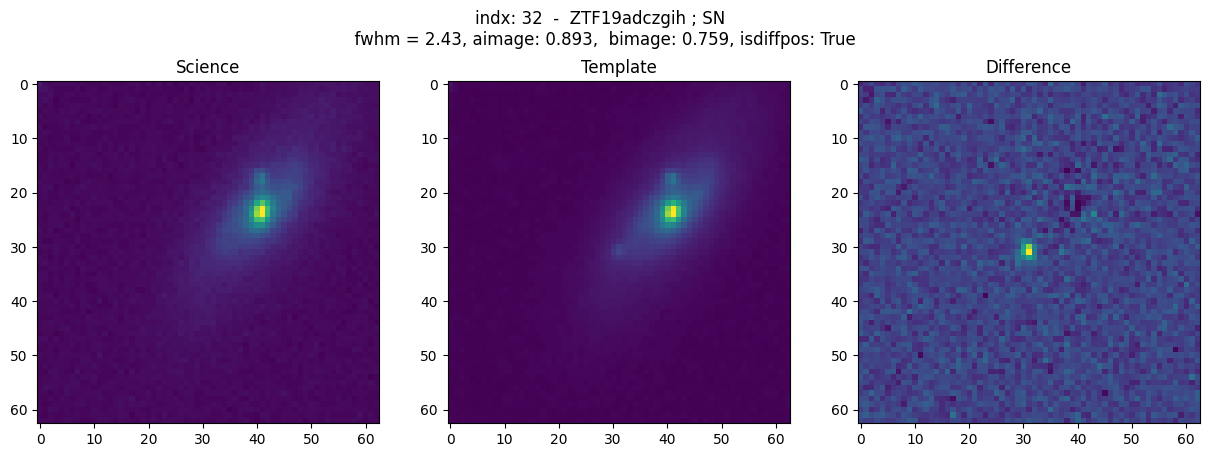

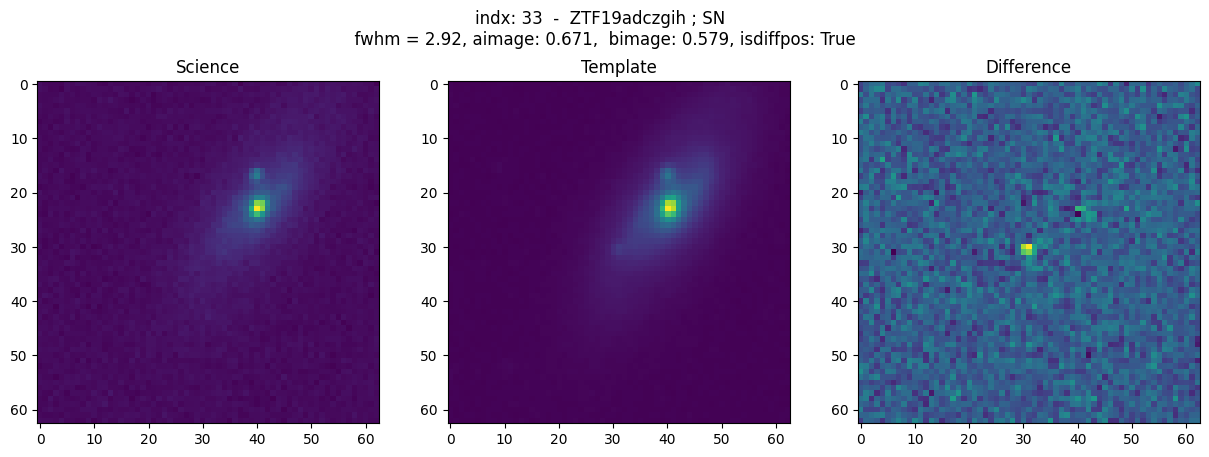

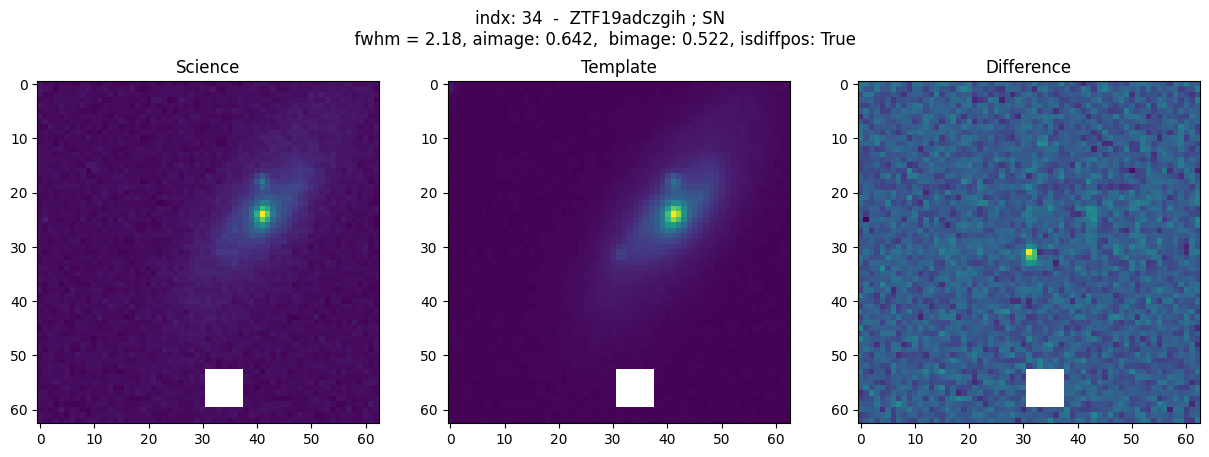

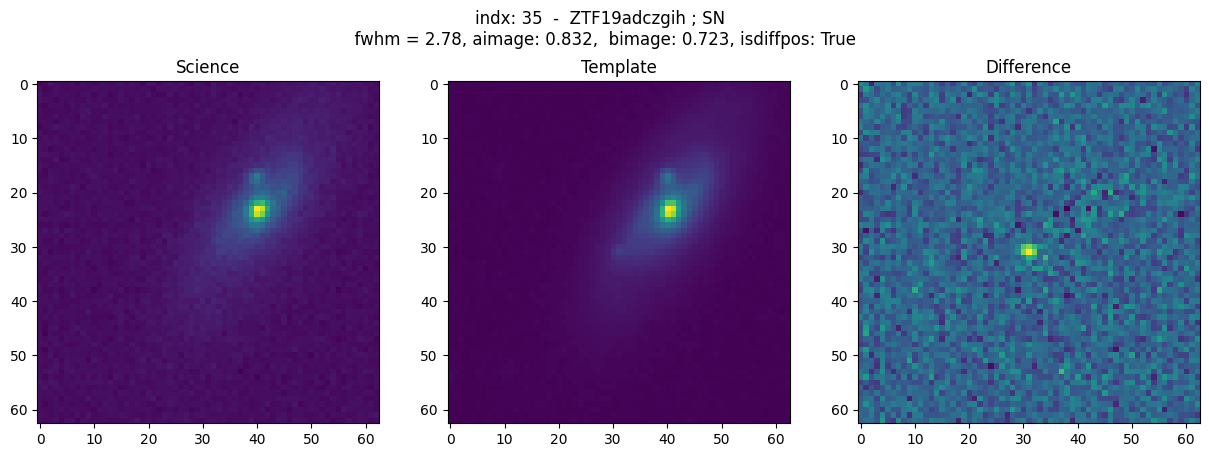

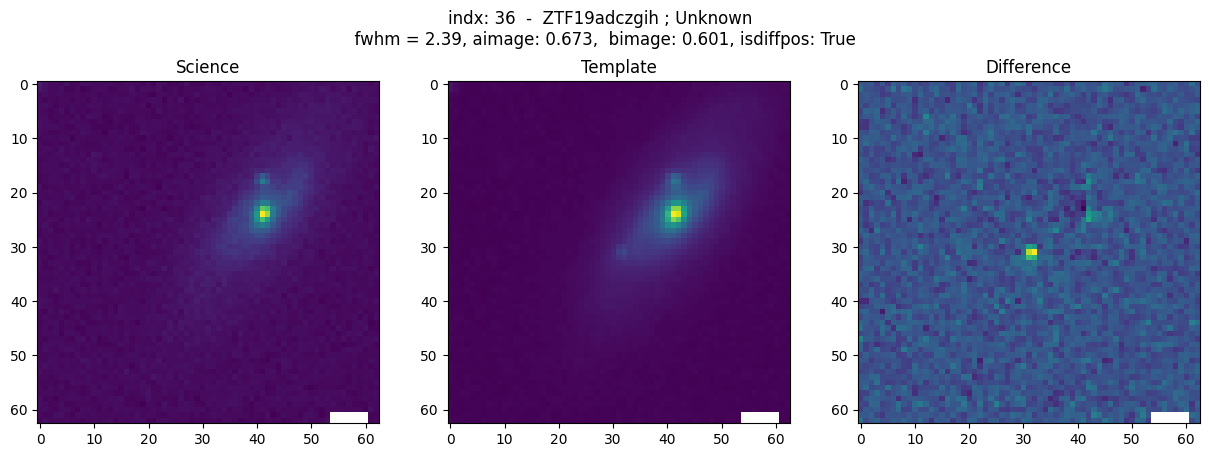

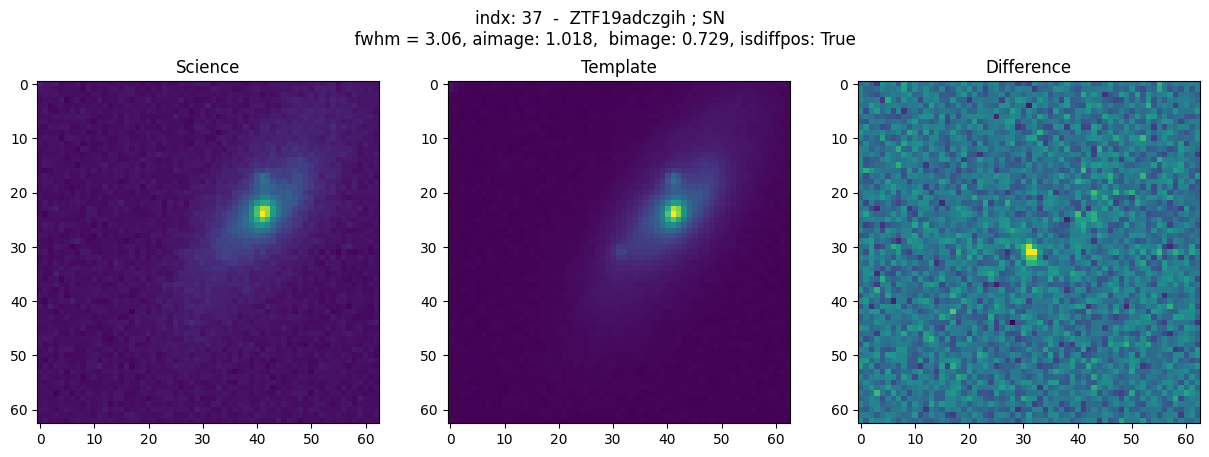

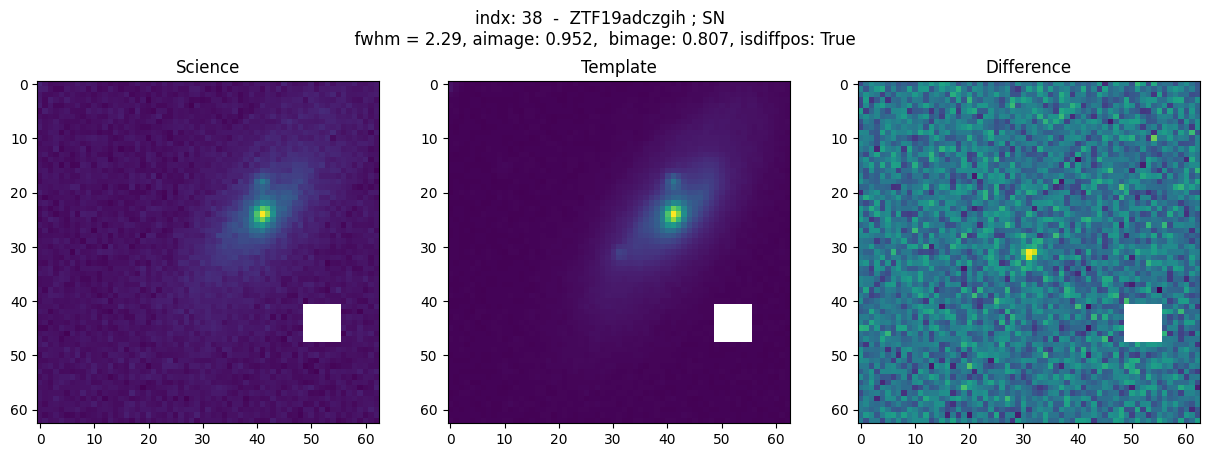

In [13]:
title = ['Science', 'Template', 'Difference']

# select a random alert
for indx in np.arange(stamps.shape[0])[~flag_stamps]:
    
    fig, axes = plt.subplots(1,3, figsize=(15,5))
    objid = stamps.iloc[indx]['i:objectId']
    fwhm = str(round(stamps.iloc[indx]['i:fwhm'], 3))
    aimage = str(round(stamps.iloc[indx]['i:aimage'], 3))
    bimage = str(round(stamps.iloc[indx]['i:bimage'], 3))
    isdiffpos = str(bool(stamps.iloc[indx]['i:isdiffpos']))
    classname = str(stamps.iloc[indx]['v:classification'])
    
    fig.suptitle('indx: ' + str(indx) + '  -  ' + objid + ' ; ' + classname + '\n  fwhm = ' + fwhm + ', ' + \
                'aimage: ' + aimage + ',  bimage: ' + bimage + ', isdiffpos: ' + isdiffpos)

    for i,ax in enumerate(axes.flat):
        ax.set_title(title[i])
        data = np.array(stamps[columns[i]].values[indx])

        ax.imshow(data.astype(float))

    plt.show()

In [ ]:
# plot positions
ra = stamps['i:ra'].values
dec = stamps['i:dec'].values


plt.figure(figsize=(8,5))
plt.scatter(ra[flag_stamps], dec[flag_stamps], label='nan')
plt.scatter(ra[~flag_stamps], dec[~flag_stamps], label='number')

plt.xlabel('ra')
plt.ylabel('dec')
plt.legend()
plt.show()

